First, we need lists for the sample function to work

In [1]:
lst1 = [1,2,3,4,5]
lst2 = [i + 2 for i in range(1,6)]
total = 0

for val in lst1:
    total = total + val
    print("val:", val, "total:", total)
    
print("total of values from lst1:",total)
print("lst2:", lst2)

total = 0
for val in lst2:
    total = total+ val
    print("val:", val, "total:", total)
print("total of values from lst12:",total)

val: 1 total: 1
val: 2 total: 3
val: 3 total: 6
val: 4 total: 10
val: 5 total: 15
total of values from lst1: 15
lst2: [3, 4, 5, 6, 7]
val: 3 total: 3
val: 4 total: 7
val: 5 total: 12
val: 6 total: 18
val: 7 total: 25
total of values from lst12: 25


Now I will build a function 

In [2]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    #for i in range(n):
        #val = list_obj[i]
        #total += val
    #return total
    for val in list_obj:
        total+= val
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    #order list by value from smallest to greatest
    list_obj = sorted(list_obj)
    #if the list is not even
    if n % 2 != 0:
        middle_index = int((n-1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n/2)
        lower_middle_index = upper_middle_index - 1
        #take avg of 2 middle numbrs
        median_ = mean(list_obj[lower_middle_index:upper_middle_index + 1])
    return median_


def mode(list_obj):
    max_count = 0
    #counter dict records # of times each valye appears in list
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    print("counter_dict sets all counts to 0 for each value", counter_dict)
    for value in list_obj:
        counter_dict[value] += 1
    print("counter_dict after adding 1 for appearance of each value", counter_dict)
    #find max number of times a value appears
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    print("maximum number of times a value appears", max_count)
    mode_ = [key for key in counter_dict if counter_dict[key]] == max_count
    return mode_

def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n-1)
    return variance_
    
def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    #determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    #check list lengths are equal 
    if n1 == n2:
        n = n1
        #sum the product of the difference
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n-1)
        return cov
    else:
        print("Lists are not of equal lenght")
        print("Length of List1:", n1)
        print("Length of List2:", n2)
        
def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x,y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / n if not sample else n * skew / ((n-1)*(n-1)*SD_ ** 3)
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n-1) ** 2) / ((n-2) * (n-3))
    return kurt

Now I will gather the statistics to apply them to the datareader later on

In [8]:
def gather_statistics (df, sample = False):
    dct = {key:{} for key in df}
    #column name is key
    #column data is val
    for key, val in df.items():
        #drop any missing observations from dataframe
        val = val.dropna(axis = 0)
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val, sample), 3)
        dct[key]["SD"] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val, sample), 3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), 3)
    stats_df = pd.DataFrame(dct)
    return stats_df

I will import pandas data reader to pull in the stock prices from Yahoo in a dictionary

In [65]:
import pandas as pd
import pandas_datareader.data as web
import datetime

#date is format (yyyy, mm, dd)
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dct = {}
stocks = ["T", "V", "AAPL", "F", "GE", "C", "NFLX", "TWTR", "TSLA" ]
#AT&T, Visa, Apple, Ford Motor Company, General Electric, Citigroup, Netflix, Twitter, Tesla
for key in stocks:
    data_dct[key] = web.DataReader(key, 'yahoo', start, end)

In [66]:
data_dct["T"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,30.540001,30.299999,30.459999,30.379999,33005300.0,18.872532
2012-01-04,30.680000,30.350000,30.580000,30.430000,37213900.0,18.903595
2012-01-05,30.500000,30.180000,30.490000,30.400000,34457000.0,18.884958
2012-01-06,30.090000,29.600000,30.070000,29.680000,45580800.0,18.708464
2012-01-09,29.850000,29.500000,29.809999,29.660000,26790100.0,18.695858
...,...,...,...,...,...,...
2020-09-21,28.820000,28.260000,28.799999,28.629999,45474000.0,28.629999
2020-09-22,28.930000,28.420000,28.530001,28.510000,28148400.0,28.510000
2020-09-23,28.690001,27.840000,28.549999,27.870001,43786800.0,27.870001


Now I will make a list of close data for each of the stocks

In [67]:
list_close_data = [val["Close"] for val in data_dct.values()]
data_keys = data_dct.keys()
#axis = 1 concatenates lists horizonally
close_data = pd.concat(list_close_data, keys = data_dct.keys(), axis = 1)
close_data

,T,V,AAPL,F,GE,C,NFLX,TWTR,TSLA
Date,,,,,,,,,
2012-01-03,30.379999,25.747499,14.686786,11.13,17.653847,28.330000,10.320000,NaN,5.616000
2012-01-04,30.430000,25.287500,14.765715,11.30,17.846153,28.170000,11.492857,NaN,5.542000
2012-01-05,30.400000,25.477501,14.929643,11.59,17.836538,28.510000,11.328571,NaN,5.424000
2012-01-06,29.680000,25.177500,15.085714,11.71,17.932692,28.549999,12.327143,NaN,5.382000
2012-01-09,29.660000,24.975000,15.061786,11.80,18.134615,29.080000,14.025714,NaN,5.450000
...,...,...,...,...,...,...,...,...,...
2020-09-21,28.629999,197.449997,110.080002,6.87,6.350000,43.930000,487.350006,39.900002,449.390015
2020-09-22,28.510000,200.559998,111.809998,6.78,6.250000,43.290001,491.170013,42.730000,424.230011
2020-09-23,27.870001,195.369995,107.120003,6.64,6.110000,41.849998,470.609985,45.330002,380.359985


We can also draw the volumn data for comparison

In [68]:
list_volume_data = [val["Volume"] for val in data_dct.values()]
volume_data = pd.concat(list_volume_data, keys = data_dct.keys(), axis = 1)
volume_data

,T,V,AAPL,F,GE,C,NFLX,TWTR,TSLA
Date,,,,,,,,,
2012-01-03,33005300.0,16829200.0,302220800.0,45709900.0,61054800.0,58169500.0,29213800.0,NaN,4640500.0
2012-01-04,37213900.0,16522000.0,260022000.0,79725200.0,44464800.0,41455000.0,100489900.0,NaN,3150500.0
2012-01-05,34457000.0,12096400.0,271269600.0,67877500.0,47651900.0,66793300.0,86552900.0,NaN,5027500.0
2012-01-06,45580800.0,13089200.0,318292800.0,59840700.0,53112100.0,48226900.0,125610800.0,NaN,4931500.0
2012-01-09,26790100.0,18002400.0,394024400.0,53981500.0,48866800.0,35017900.0,214073300.0,NaN,4485000.0
...,...,...,...,...,...,...,...,...,...
2020-09-21,45474000.0,9656000.0,195713800.0,72850300.0,162739600.0,33469700.0,5457500.0,13790000.0,109476800.0
2020-09-22,28148400.0,7543100.0,183055400.0,55865500.0,140901000.0,25799200.0,3482300.0,22379000.0,79580800.0
2020-09-23,43786800.0,6310600.0,150718700.0,52588600.0,88644700.0,28780200.0,3726400.0,64803800.0,95074200.0


To graph the data, I will import matplotlib.pyplot as plt

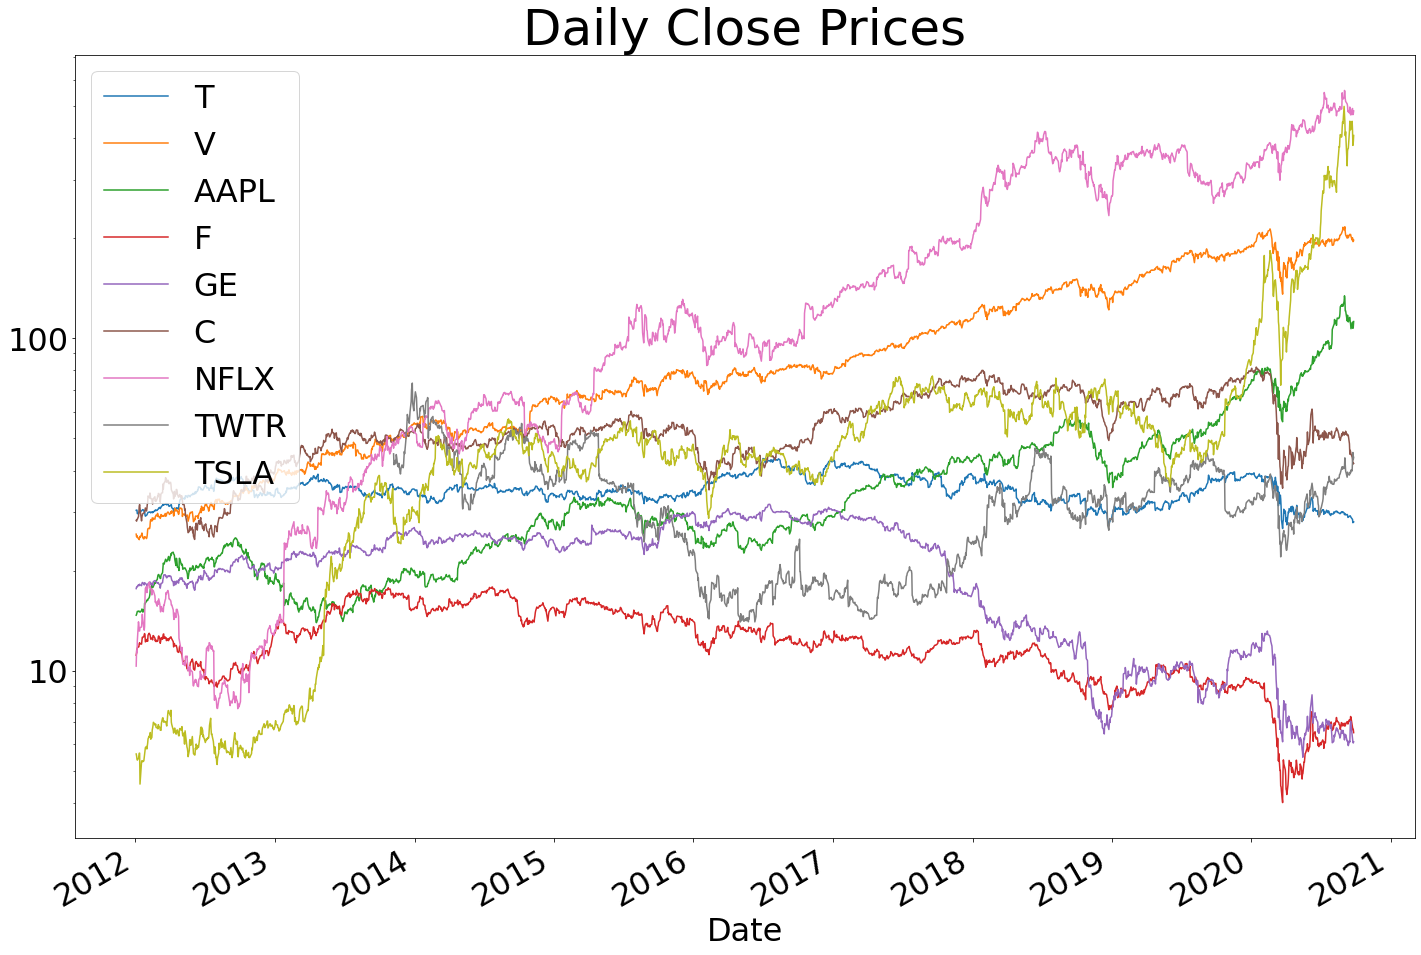

In [69]:
import matplotlib.pyplot as plt

#set default font size
plt.rcParams.update({"font.size": 32})

#create a new figure to use for plotting
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

#set axis as logged to view changes in proportional terms instead of absolute
ax.set_yscale("log")

#reset y labels to integer from scientific notation
#ax.get_yticks() generates a list of the axis values for the y axis
y_vals = ax.get_yticks()
#set axis labels with reformat_values instead of existing values
ax.set_yticklabels([int(y) if y >= 1 else round (y,1) for y in y_vals])


#ax.set_xticklabels(reformat_x_values)
#reformat_x_values = close_data.index
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.title("Daily Close Prices", fontsize = 50)
#show visualization
plt.show()
#remove fig, ax by closing
plt.close()

With the exception of General Electric and Ford Motor Company, the rest of the stocks have been generally trending upward since 2017/2018.

Rate of change may make a more interesting study, allowing us to compare volatility.

In [70]:
#pct_change gives percent as decimal
price_change_data = close_data.pct_change() * 100
price_change_data

,T,V,AAPL,F,GE,C,NFLX,TWTR,TSLA
Date,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.164586,-1.786578,0.537415,1.527404,1.089318,-0.564772,11.364897,NaN,-1.317670
2012-01-05,-0.098589,0.751361,1.110194,2.566371,-0.053877,1.206958,-1.429459,NaN,-2.129196
2012-01-06,-2.368419,-1.177514,1.045381,1.035374,0.539080,0.140298,8.814628,NaN,-0.774333
2012-01-09,-0.067387,-0.804287,-0.158618,0.768575,1.126007,1.856395,13.779115,NaN,1.263468
...,...,...,...,...,...,...,...,...,...
2020-09-21,-1.036990,-2.546767,3.032577,-4.979255,-7.703491,-2.073117,3.700318,-0.622665,1.637458
2020-09-22,-0.419137,1.575083,1.571580,-1.310039,-1.574802,-1.456862,0.783832,7.092727,-5.598701
2020-09-23,-2.244824,-2.587756,-4.194611,-2.064902,-2.239998,-3.326409,-4.185929,6.084723,-10.341094


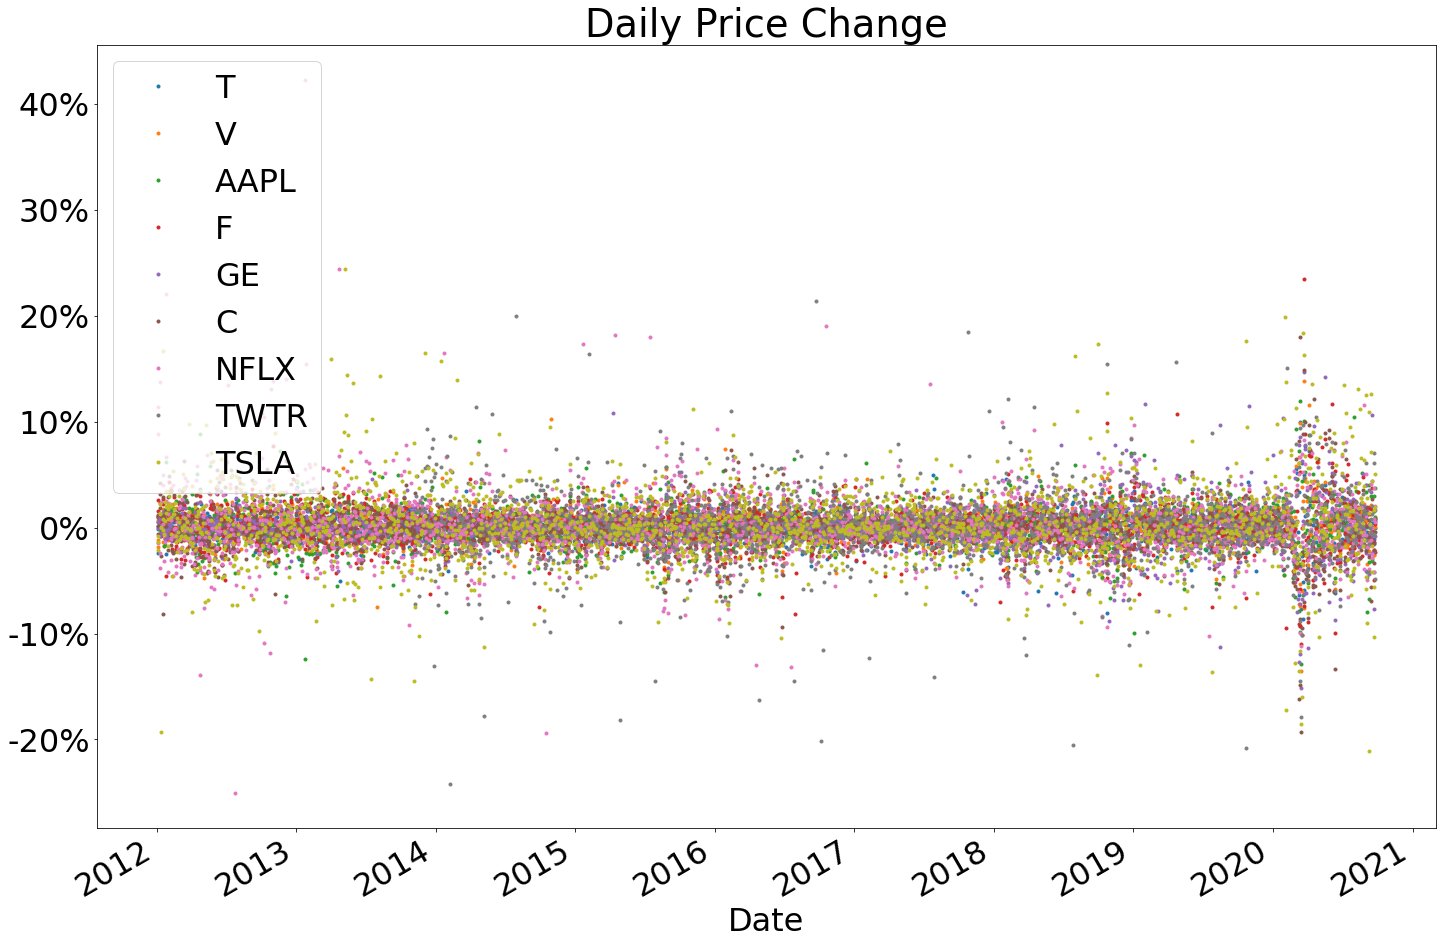

In [71]:
plt.rcParams.update({"font.size":32})
#make a new figure with plt.subplots()
fig, ax = plt.subplots(figsize = (24,16))

#for each key in price_change_data, plot using "." as the marker 
for key in price_change_data:
    price_change_data[key].plot.line(marker = ".", ls = " ", ax = ax)
# loc - "upper left" "upper right"
plt.legend(loc = "upper left")
plt.title("Daily Price Change")

#access Y_vals, transform to string with %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+"%" for y in y_vals])
plt.show()
plt.close()

With so many datapoints, this graph is certainly hard to interpret. We can see that early-mid 2020 experience a wide range of price change, possibly at the start of the COVID-19 pandemic. However, statistical measures would give us much better ways to compare and contrast the various stocks.

## Distributions

Next we will visualize distriubtion of price change data. In the same visualization we will include summary statistics. We can plot the distribution of daily price changes for each stock, and later include statistics that describe the mean, median, mode, SD, skewness, kurtosis.

The dataframe below uses tha gather statistics function that we created earlier.

In [72]:
stats_df = gather_statistics(price_change_data)
stats_df

,T,V,AAPL,F,GE,C,NFLX,TWTR,TSLA
mean,0.004,0.104,0.109,-0.007,-0.028,0.039,0.222,0.058,0.256
median,0.057,0.152,0.089,0.000,-0.037,0.037,0.029,0.081,0.122
variance,1.582,2.303,3.233,3.415,4.035,4.280,9.594,11.639,12.339
SD,1.258,1.518,1.798,1.848,2.009,2.069,3.097,3.412,3.513
skewness,0.000,0.000,0.022,-0.005,0.000,-0.000,0.003,0.002,0.050
kurtosis,12.063,14.262,10.014,19.858,13.032,16.151,27.341,11.884,9.490


A histogram is a common way to view distributions, so we can build one next using pandas and matplotlib.

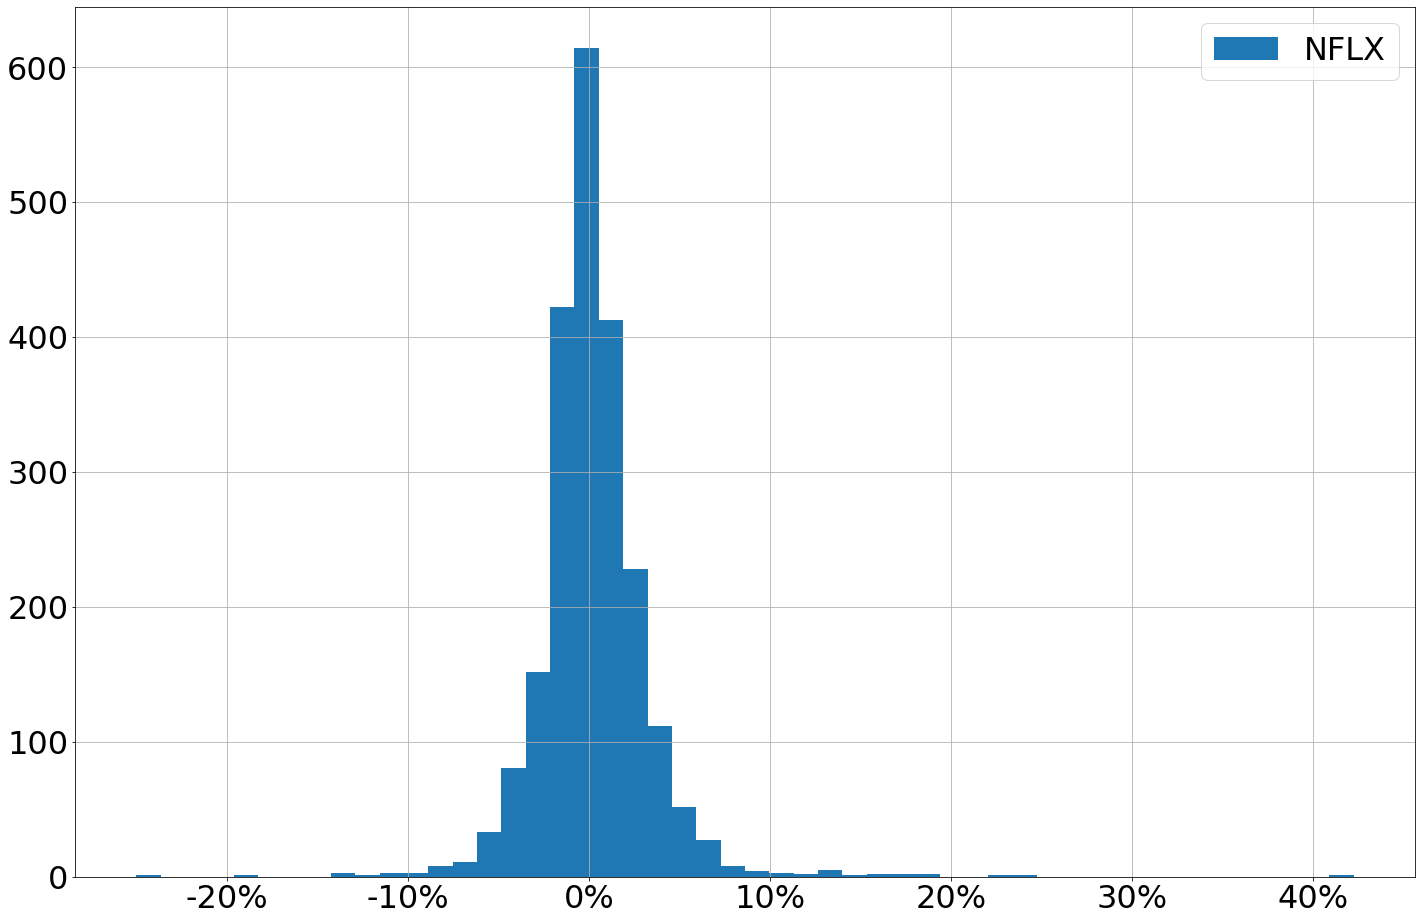

In [76]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["NFLX"].hist(bins = 50, label = "NFLX")
#set horizontal axis as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])

plt.legend()

Since the histogram shows counts on the y axis, percentages would be a better way to view the graph and thus make it a distribution.

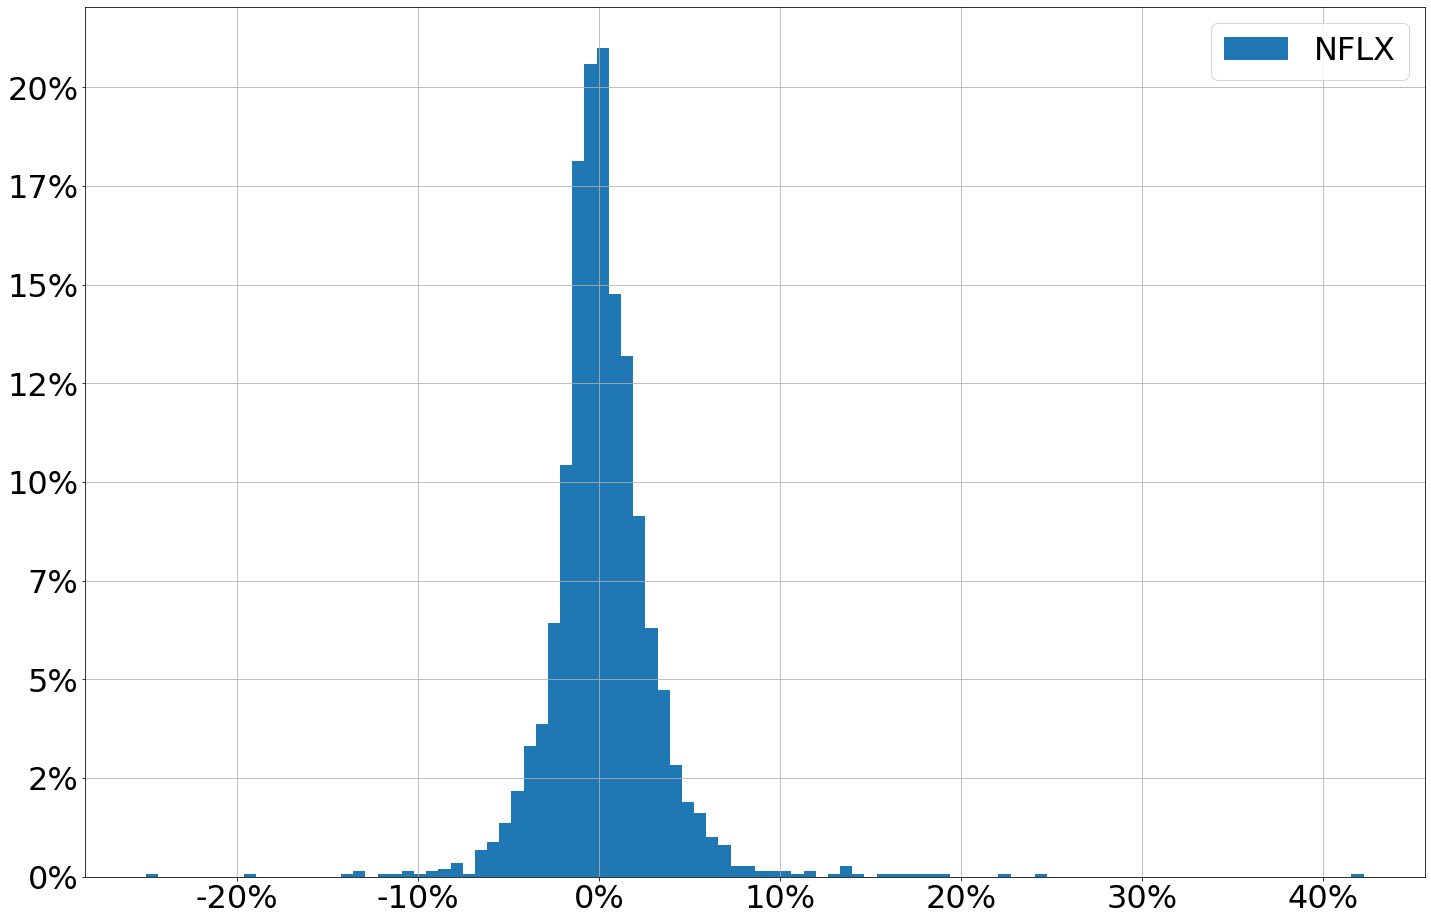

In [77]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["NFLX"].hist(bins = 100, label = "NFLX",
                             density = True)
#set horizontal axis as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
#set vert axis as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])

plt.legend()

Above shows the distribution of Netflix. The bins are set to 100 to show more detail as to the distribution. It will be more useful to view all of the stocks in one dashboard.

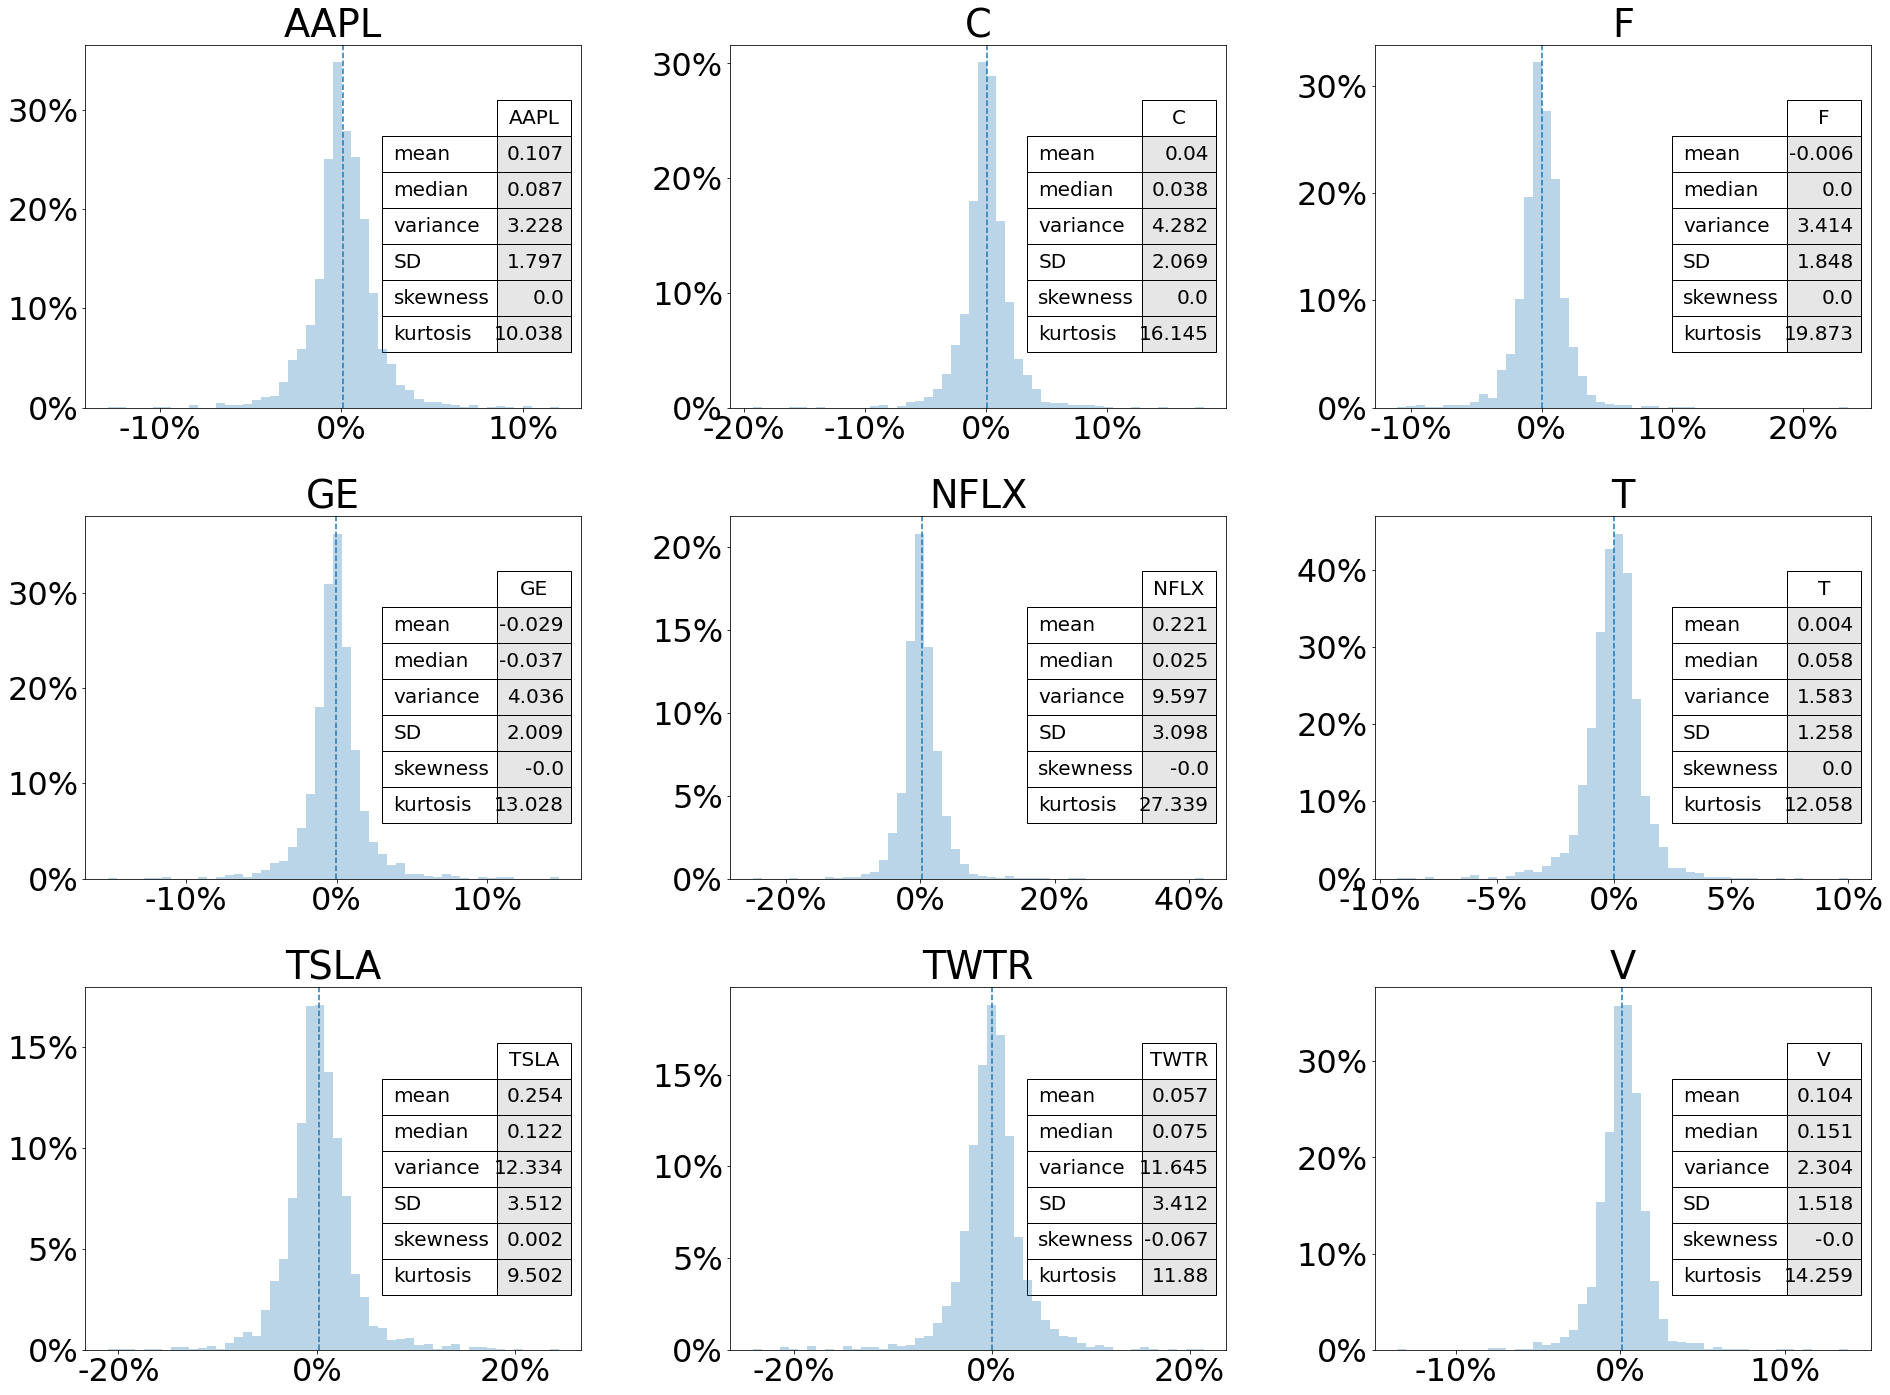

In [74]:
from pandas.plotting import table

#adding (3,3, . . . in subplots makes a 3 x 3 list)
fig, ax = plt.subplots(3,3, figsize = (32, 24))
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

#plot tables with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        #identify stock
        stock = a.get_title()
        #save summary statistics data
        hist_data = stats2_df[stock]
        #plot summary statistics within the histogram plot
        stats = table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        #cell colors calls color in terms of {r, g, b}, all 1 is black, all 0 is white
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        #mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        #set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
        #turn of grid lines
        a.grid(False)
        
plt.show()

Netflix, Twitter, and Tesla have the biggest standard deviations, possibly because the stocks of these companies are affected by popular culture, politics, even a single tweet or movie release. Therefore they can have greater rates of change both positive and negative due to wide variations in public opinion that is reflected in trader's actions. Stocks such as general electric, visa, and AT&T don't experience these same swings from public opinion.

We can also look at the stocks' distributions on a single plot. We can make them semi-transparent and not fill in the bins, so as to try see all of them in some way.

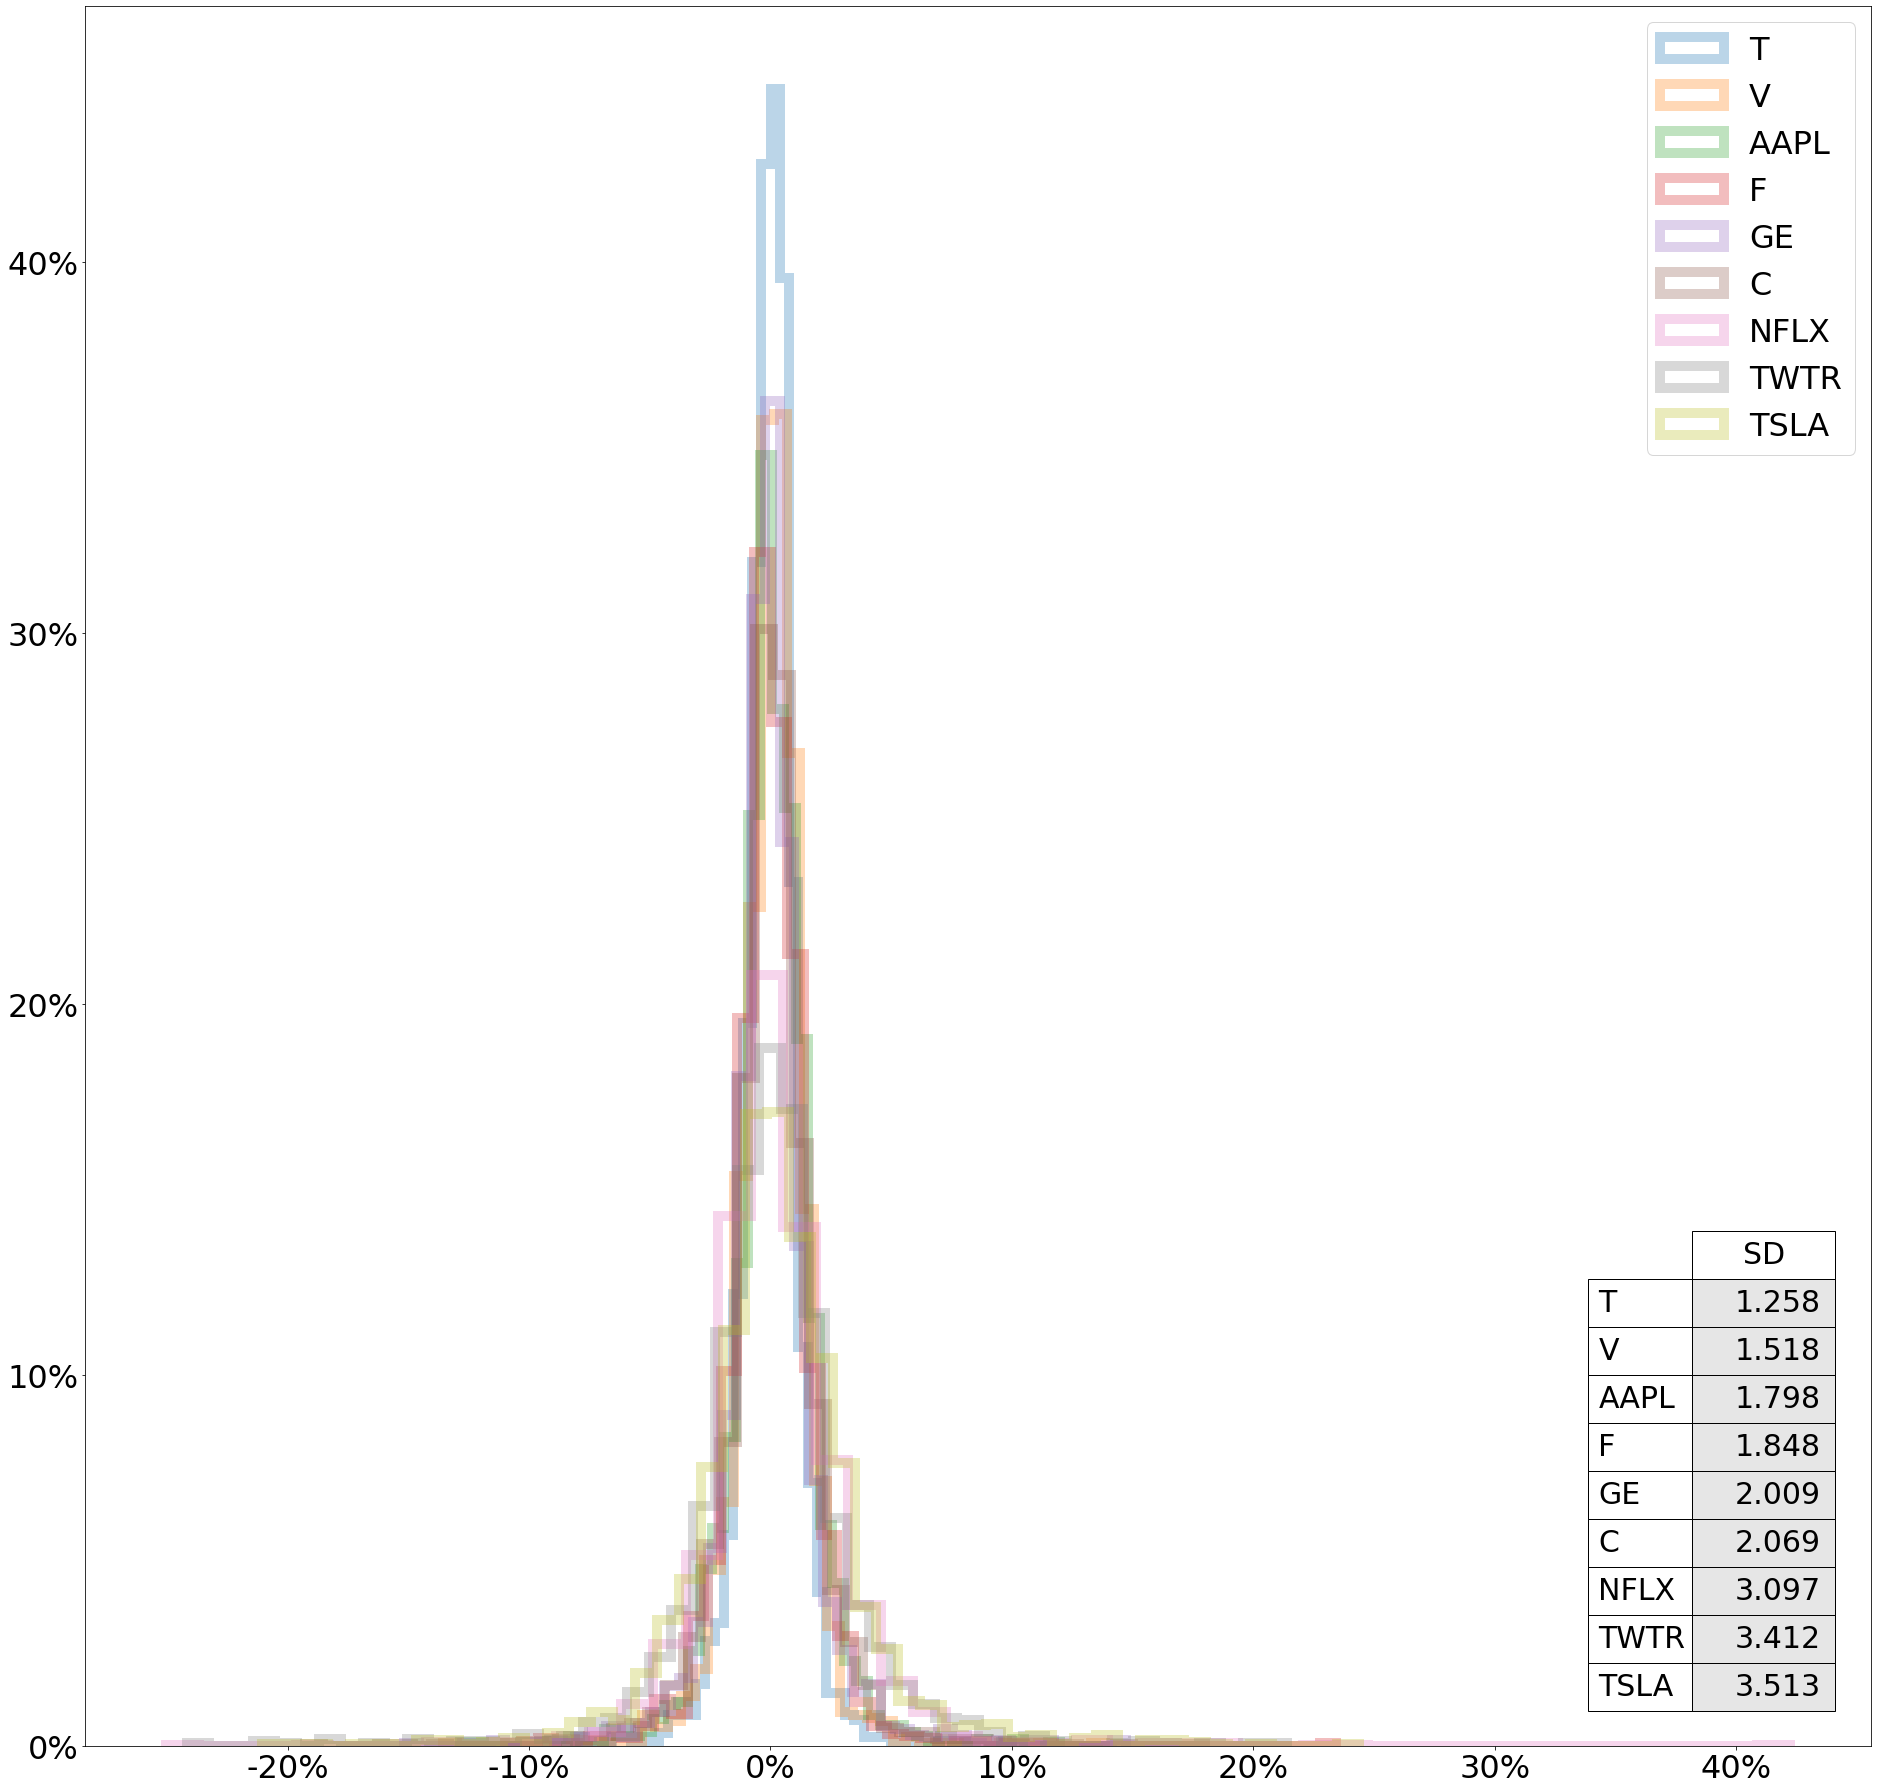

In [75]:
fig, ax = plt.subplots(figsize = (32,32))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = .3, label = key, linewidth = 10, density = True)

# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["SD"], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*9, loc = "lower right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

The tallest distributions are the most stable, since their values vary the least from the mean. So, the order from least volatile to most is: AT&T, Visa, AAPL, Ford Motor Company, General Electric, Citigroup, Netflix, Twitter, and Tesla, with over an entire integer in between Citigroup and Netflix. The least volatile stocks are well established companies that have good brand reputation with the public and traders alike. People know what to expect from their company, so the trading reflects that. Growth may be slower, but less drops are experienced by these companies as well. They're also giants in their respective industries, so a bigger-valued stock has to gain a lot or lose a lot in terms of dollars to have large percent changes. However, using percent changes helps reflect each company in a comparable way that can show performance across various mean stock prices. Like previously discussed, the three big players in terms of volatility are Netflix, Twitter, and Tesla. These companies are widely-discussed and create strong public opinons that can appear in the market very easily. 

For the purpose of demonstrating skills, we will fill in the curves under the lines. However, with 9 stocks it may not provide us much analytical value in this case.

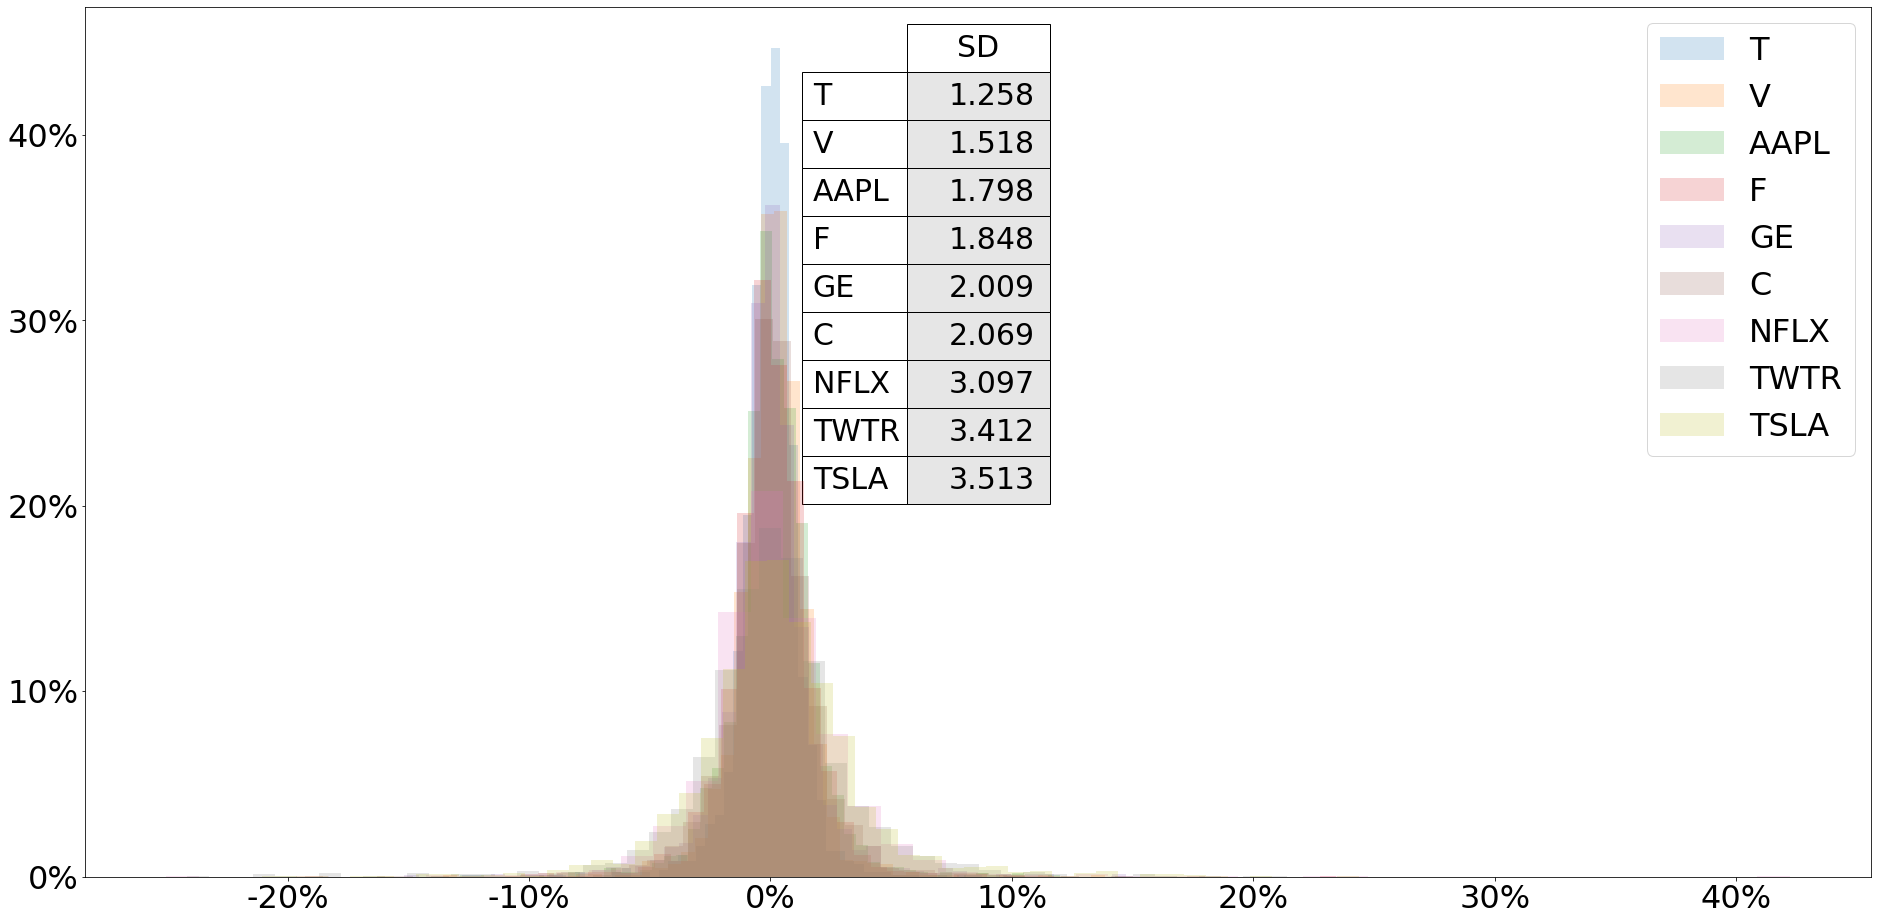

In [119]:
fig, ax = plt.subplots(figsize = (32,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, density = True)
    
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])

# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["SD"], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*9, loc = "upper center")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()